# Data analysis of SpringSaLaD output
Author: Aniruddha Chattaraj <br>

SpringSaLaD is an open source biochemical simulation platform. For download and user's guide, please visit https://vcell.org/ssalad. <br>

This tutorial assumes that we already have some simulated data and we want to analyze the results. <br>

We create the model using graphical interface of SpringSaLaD and run multiple trials of a given simulation condition using the high performance facility at UConn Health https://health.uconn.edu/high-performance-computing/. Next, to analyze the results, we execute the following python routines. All the packages are managed by Anaconda distributor. 
<br>
### Import packages and specify the input file

- Import the relevant packages first. Currently we have to place the files in the same directory as the notebook. It will be bundled together in near future to automate the depenedency management.
- Specify the full path of the simulation input file ("myfile_SIM.txt"). Make sure that the input file you are selecting resides inside the "_SIM_FOLDER". An identical file would exist outside the folder also. We want the inner "_SIM.txt" file to comply with the directory structure of the python code.

In [2]:
from ssalad_ClusterAnalysis import *
from plotClusterDist import plotDistribution, plotDynamics
from MoleculeCounter import MoleculeCounter
from ClusTopology_ss import ClusterDensity

# Location of the simulation input file (directory structure is important)
file = "./test_dataset/A5_B5_flex_3nm_2nm_count_200_SIM_FOLDER/A5_B5_flex_3nm_2nm_count_200_SIM.txt"
#file = "./test_dataset/A5_B5_rigid_ISD_2nm_count_160_SIM_FOLDER/A5_B5_rigid_ISD_2nm_count_160_SIM.txt"

### Collect statistics across multiple stochastic runs
- Compute the free molecular concentrations
- Collect the statistics of execution times across multiple runs
- Collect the clusters
    - compute the average timecourse across multiple runs
    - compute the distribution at the steady state timepoints defined by the user
    - compute radius of gyration of individual clusters
    - quantify degree of cross-linking, that is, number of bonds per individual molecules present in the clusters

Getting molecular counts...
Wrote data! Filepath: ./test_dataset/A5_B5_flex_3nm_2nm_count_200_SIM_FOLDER/pyStat/Count_Stat/Molecular_Concentration.csv


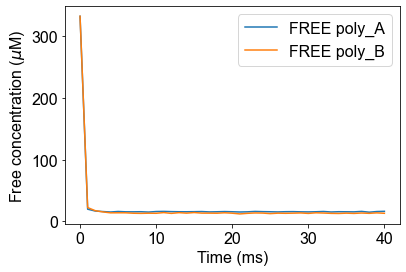

In [3]:
# Compute the free molecular concentrations
molecules = ['FREE poly_A', 'FREE poly_B']
path = '/'.join(file.split('/')[:-1]) # "_SIM_FOLDER" location
mc = MoleculeCounter(path)
mc.getMoleculeStat(molecules)

Class : RunTimeStatistics
System : A5_B5_flex_3nm_2nm_count_200_SIM.txt
Getting runtime stats ...
Progress : [****************************************] 100%


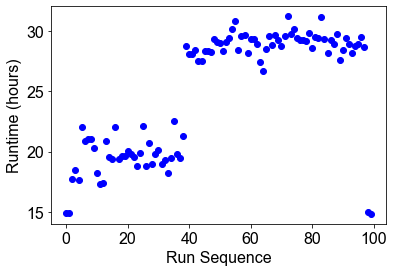

Done plotting the stats ...!
Execution time : 0.2049 secs


In [4]:
# Collect and save the execution times 
rts = RunTimeStatistics(file)
print(rts)
rts.getStat()


Class : ClusterAnalysis
System : A5_B5_flex_3nm_2nm_count_200_SIM.txt
Total_Time : 0.04 seconds		numRuns : 100

TimeCourse_calc : [****************************************] 100%
Done
Execution time : 9.8539 secs
Distribution_calc : [****************************************] 100%
Execution time : 1.1842 secs


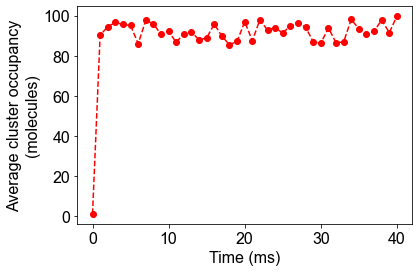

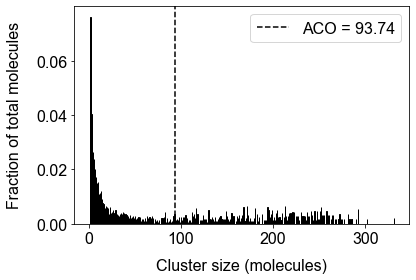

In [5]:
# compute timecourse of clustering and cluster distribution at specified timepoints (ss = steady state)
#help(ClusterAnalysis.__init__)
#print()
ca = ClusterAnalysis(file)
print(ca)
ca.getMeanTrajectory(SingleTraj=False)
ca.getSteadyStateDistribution(SS_timePoints=[0.01,0.02,0.03,0.04])

plotDynamics(path)
plotDistribution(path)


System:  A5_B5_flex_3nm_2nm_count_200
Calculating Cluster Density ...
Progress : [****************************************] 100%


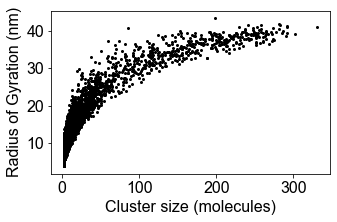

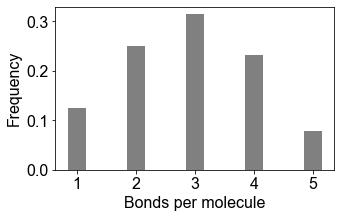

Execution time : 42.1563 secs


In [6]:
# compute degree of cross-linking by extracting bonds per molecules and radius of gyration of individual clusters
cd = ClusterDensity(file, ss_timeSeries=[ 0.01, 0.02, 0.03, 0.04])
cd.getCD_stat(cs_thresh=1)